In [15]:
'''Write in the txt file of gender_age data for relabelling by Kmeans
   Instead of the traditional content-based category, we assign new category based on their gender age composition by applying unsupervised learning
   -----Alex Snow, Yunlu Li
'''
import numpy as np
import pandas as pd
df = pd.read_csv('\\\\CSIADDFS01\SyndicatedOps\MoMX\yunlu&alex\Final_txt\For_Retrieval\gender_age_id4.txt', sep = '\t')

In [16]:
#We prepare the data of the most recent month 
df = df[df['month_id'] == 230]
#Group by web_id 
df_test = df.groupby(['web_id'])
#Define function to reshape the dataframe and only focus on uv_pct
def pivot(x):
    df = pd.DataFrame()
    for segment in np.unique(x['gender_age_id']):
        segment = str(segment)
        df[segment+ ' uv_pct' ] = np.array(x[x['gender_age_id'] == segment]['uv_pct'])
    return df
#Apply the function to each web_id and clean up
full = df_test.apply(pivot)

full = full.dropna()
full.index = full.index.droplevel(1)
full

,Female: 18-24 uv_pct,Female: 2-17 uv_pct,Female: 25-34 uv_pct,Female: 35-54 uv_pct,Female: 55+ uv_pct,Male: 18-24 uv_pct,Male: 2-17 uv_pct,Male: 25-34 uv_pct,Male: 35-54 uv_pct,Male: 55+ uv_pct
web_id,,,,,,,,,,
10429,6.734956,1.152563,10.057733,28.715391,5.009871,6.576584,1.258092,9.768232,25.289755,5.436823
10531,6.789288,0.481121,10.919898,37.679132,8.456660,2.964353,0.437999,7.642237,19.877530,4.751782
10583,2.869065,0.200320,9.631877,34.478493,6.140279,3.073528,0.142136,8.955290,28.347889,6.161124
10672,5.215922,1.441251,11.114770,30.837584,4.608127,4.668497,1.440910,8.505274,26.439640,5.728025
10779,3.607843,0.334328,11.166694,31.842077,6.369707,3.072440,0.252579,9.063088,27.847712,6.443531
10841,9.040863,0.593857,11.555171,30.072294,6.293278,4.399156,0.529905,8.136081,22.429250,6.950145
11320,5.520863,4.074265,8.712672,25.545206,6.121842,5.797337,4.626856,9.449152,23.541662,6.610145
11455,4.580928,0.194896,8.238386,22.951724,3.695372,4.269884,0.381674,12.214683,35.547133,7.925320
14248,3.029484,0.450972,8.876826,30.897374,6.652039,3.090433,0.677298,7.482002,32.837452,6.006119


In [17]:
#Import unsupervised learning package
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage, dendrogram

In [18]:

#prepare the dataframe by applying scaling function
x = full.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
full_scaled = pd.DataFrame(x_scaled)
full_scaled

,0,1,2,3,4,5,6,7,8,9
0,0.148490,0.045669,0.219302,0.545252,0.295437,0.210405,0.035149,0.274606,0.456784,0.284756
1,0.150073,0.018953,0.244439,0.763098,0.518496,0.074374,0.012105,0.177664,0.337746,0.244890
2,0.035858,0.007780,0.206886,0.685313,0.368591,0.078485,0.003791,0.237537,0.524046,0.326906
3,0.104233,0.057156,0.250121,0.596828,0.269438,0.138549,0.040286,0.217017,0.482075,0.301702
4,0.057382,0.013112,0.251635,0.621240,0.383439,0.078444,0.006895,0.242453,0.513045,0.343340
5,0.215672,0.023438,0.262961,0.578229,0.378493,0.128406,0.014687,0.200183,0.393869,0.372823
6,0.113117,0.161921,0.180086,0.468207,0.367398,0.181060,0.129808,0.260057,0.418336,0.353036
7,0.085733,0.007564,0.166258,0.405178,0.210369,0.123538,0.010522,0.386161,0.682390,0.429572
8,0.040532,0.017753,0.184872,0.598281,0.401710,0.079122,0.018829,0.170358,0.622792,0.317885
9,0.200133,0.007686,0.308516,0.753563,0.408623,0.099135,0.003832,0.150888,0.316231,0.225080


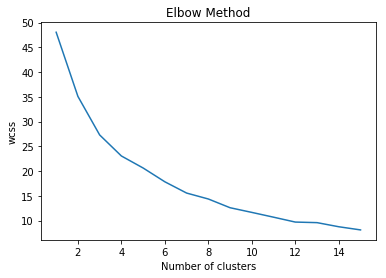

In [19]:
'''Since we do not know the optimal number of clusters, so we use Elbow Curve to identify the optimal number.
   Connect the initial and end point of the curve as a straight line. Pick up the point whose distance from the straight line 
   is largest. The corresponding x value is the optimal number of clusters.
'''
# Try 1-15 clusters and calculate inertia for each number of clusters
wcss = []
for i in range (1,16): 
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=500) 
    kmeans.fit(full_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,16),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


In [20]:
#Calculate the slope and intercept of the straight line
y14 = wcss[len(wcss) - 1]
y0 = wcss[0]
x14=15
x0=1
m = (y14 - y0)/(x14-x0)
b = y0 - m*x0

In [21]:
#Distance calculation function
def euclid(x,y,x1,y1):
    abso = ((x - x1) ** 2) + ((y - y1) ** 2)
    return abso ** (1/2)


In [22]:
#Do some geometry calculation and get distance for each point on the Elbow curve
#Find the max distance and get the optimal number of clusters
distances = []
for i in range(15):
    y = wcss[i]
    x = i + 1
    b1 = y + (1/m)*x
    x1 = (b1 - b)/(m+1/m)
    y1 = m*x1 + b
    distances.append(euclid(x,y,x1,y1))
Cluster_number = distances.index(max(distances)) + 1
distances

[7.771561172376096e-16,
 3.344340029792454,
 4.976624139537169,
 5.439344471825185,
 5.299489202583677,
 5.277750438375342,
 5.086610929414033,
 4.539838680785257,
 4.180059871892607,
 3.548127967598639,
 2.9244408358698584,
 2.3069024035856565,
 1.4011273663679382,
 0.7323723813992099,
 5.617333549722722e-15]

In [23]:
#Do KMeans
state = np.random.randint(1000)
kmeans = KMeans(n_clusters = 4, init='k-means++', random_state=4) 
kmeans.fit(full_scaled)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(full_scaled)

In [24]:
'''If you would like to see the visulization of clustering process, uncomment below
'''

'''
full_scaled['web_id'] = full.index
web_id = full_scaled['web_id'].tolist()
samples = full_scaled.values
mergings = linkage(samples, method='complete')
dendrogram(mergings, labels=web_id, leaf_rotation = 90, leaf_font_size = 1)
plt.show()
'''

"\nfull_scaled['web_id'] = full.index\nweb_id = full_scaled['web_id'].tolist()\nsamples = full_scaled.values\nmergings = linkage(samples, method='complete')\ndendrogram(mergings, labels=web_id, leaf_rotation = 90, leaf_font_size = 1)\nplt.show()\n"

In [25]:
#By checking centroids, we can understand what each cluster stands for
pd.DataFrame(centroids, columns = full.columns)

,Female: 18-24 uv_pct,Female: 2-17 uv_pct,Female: 25-34 uv_pct,Female: 35-54 uv_pct,Female: 55+ uv_pct,Male: 18-24 uv_pct,Male: 2-17 uv_pct,Male: 25-34 uv_pct,Male: 35-54 uv_pct,Male: 55+ uv_pct
0,0.113070,0.062381,0.217872,0.553760,0.307284,0.159625,0.045022,0.255431,0.481437,0.320157
1,0.066752,0.009170,0.094057,0.190562,0.099015,0.318351,0.015169,0.469206,0.811686,0.464526
2,0.418193,0.154456,0.252282,0.252236,0.070813,0.550149,0.131985,0.437187,0.241201,0.062088
3,0.179526,0.020301,0.348508,0.743512,0.307449,0.106983,0.010798,0.189109,0.324885,0.184784


In [26]:
#Append labels with meanings
full['labels'] = labels
full['labels'] = full['labels'].replace({0: 'Professional(35+)', 1: 'Male', 2: 'Young(18-35)', 3: 'Female'})


In [27]:
#Append the label to the original data and write out labeled data
full = full.reset_index()
for_join = full[['web_id', 'labels']]
export = pd.read_csv('\\\\CSIADDFS01\SyndicatedOps\MoMX\yunlu&alex\Final_txt\For_Retrieval\gender_age_id4.txt', sep = '\t')
final_df = export.merge(right = for_join, how = 'inner', left_on = 'web_id', right_on = 'web_id').drop(labels = 'Unnamed: 0', axis = 1)
final_df.to_csv('\\\\CSIADDFS01\SyndicatedOps\MoMX\yunlu&alex\\labels_230.txt', sep = '\t')